In [1]:
ls

'Data_Science_interview - Data_Science_interview.csv'   test.ipynb


In [120]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data_Science_interview - Data_Science_interview.csv')

In [4]:
df.shape

(110, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  110 non-null    int64 
 1   Message     105 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [6]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
Message       5
dtype: int64

In [7]:
# dropping null values
df = df.dropna()
df.shape

(105, 2)

In [8]:
df.head()

,Unnamed: 0,Message
0,0,❗️New users are restricted until they ➡️ [CLIC...
1,1,...............❗️Warning❗️...............\n❗PL...
2,2,Do you see wyckoff on chart?
3,3,Kraken allowed PayPal ser
4,4,I think the real crypto bullrun maybe starting...


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

,Message
0,❗️New users are restricted until they ➡️ [CLIC...
1,...............❗️Warning❗️...............\n❗PL...
2,Do you see wyckoff on chart?
3,Kraken allowed PayPal ser
4,I think the real crypto bullrun maybe starting...


In [11]:
df.describe()

,Message
count,105
unique,75
top,The volume dies down the entire pattern which ...
freq,2


In [12]:
# checking duplicated
df[df.duplicated()]

,Message
32,...............❗️Warning❗️...............\n❗PL...
33,Do you see wyckoff on chart?
34,Kraken allowed PayPal ser
35,I think the real crypto bullrun maybe starting...
36,Exchange bro
37,Nummer chart looks clean OK?
38,Where can I buy Litecoin with PayPal?
39,"anyways i hope you are right bro, we all want ..."
40,"wait what, your chart said it broke out of the..."
41,"If we breakout of this pattern, requires a sig..."


In [13]:
# checking length of duplicated
len(df[df.duplicated()])

30

In [14]:
# dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df[df.duplicated()]

,Message


In [16]:
df['Message'] = df['Message'].astype('str')

In [17]:
df["num_char"] = df["Message"].apply(lambda x: len(x))

In [18]:
df.head()

,Message,num_char
0,❗️New users are restricted until they ➡️ [CLIC...,193
1,...............❗️Warning❗️...............\n❗PL...,660
2,Do you see wyckoff on chart?,28
3,Kraken allowed PayPal ser,25
4,I think the real crypto bullrun maybe starting...,94


In [19]:
df["Message"].apply(lambda x: nltk.word_tokenize(x))

0      [❗️New, users, are, restricted, until, they, ➡...
1      [..............., ❗️Warning❗️, ..................
2                  [Do, you, see, wyckoff, on, chart, ?]
3                         [Kraken, allowed, PayPal, ser]
4      [I, think, the, real, crypto, bullrun, maybe, ...
                             ...                        
104                                              [Ratio]
106                                           [its, ltc]
107              [the, silver, to, Bitcoin, 's, gold, .]
108             [was, top, 3, six, years, ago, as, well]
109    [Anyways, ,, there, is, no, point, in, arguing...
Name: Message, Length: 75, dtype: object

In [20]:
df["num_words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df["tokens"] = df["Message"].apply(lambda x: nltk.word_tokenize(x))

In [22]:
df.head()

,Message,num_char,num_words,tokens
0,❗️New users are restricted until they ➡️ [CLIC...,193,27,"[❗️New, users, are, restricted, until, they, ➡..."
1,...............❗️Warning❗️...............\n❗PL...,660,132,"[..............., ❗️Warning❗️, .................."
2,Do you see wyckoff on chart?,28,7,"[Do, you, see, wyckoff, on, chart, ?]"
3,Kraken allowed PayPal ser,25,4,"[Kraken, allowed, PayPal, ser]"
4,I think the real crypto bullrun maybe starting...,94,20,"[I, think, the, real, crypto, bullrun, maybe, ..."


In [23]:
df["Message"].apply(lambda x: nltk.sent_tokenize(x))

0      [❗️New users are restricted until they ➡️ [CLI...
1      [...............❗️Warning❗️...............\n❗P...
2                         [Do you see wyckoff on chart?]
3                            [Kraken allowed PayPal ser]
4      [I think the real crypto bullrun maybe startin...
                             ...                        
104                                              [Ratio]
106                                            [its ltc]
107                      [the silver to Bitcoin's gold.]
108                    [was top 3 six years ago as well]
109    [Anyways, there is no point in arguing with th...
Name: Message, Length: 75, dtype: object

In [24]:
df["num_sentence"] = df["Message"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df['sentences'] = df["Message"].apply(lambda x: nltk.sent_tokenize(x))

In [26]:
df.head()

,Message,num_char,num_words,tokens,num_sentence,sentences
0,❗️New users are restricted until they ➡️ [CLIC...,193,27,"[❗️New, users, are, restricted, until, they, ➡...",1,[❗️New users are restricted until they ➡️ [CLI...
1,...............❗️Warning❗️...............\n❗PL...,660,132,"[..............., ❗️Warning❗️, ..................",4,[...............❗️Warning❗️...............\n❗P...
2,Do you see wyckoff on chart?,28,7,"[Do, you, see, wyckoff, on, chart, ?]",1,[Do you see wyckoff on chart?]
3,Kraken allowed PayPal ser,25,4,"[Kraken, allowed, PayPal, ser]",1,[Kraken allowed PayPal ser]
4,I think the real crypto bullrun maybe starting...,94,20,"[I, think, the, real, crypto, bullrun, maybe, ...",2,[I think the real crypto bullrun maybe startin...


In [27]:
df[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,75.000000,75.000000,75.000000
mean,64.280000,13.680000,1.133333
std,85.054761,16.890874,0.474579
min,1.000000,1.000000,1.000000
25%,26.000000,6.000000,1.000000
50%,52.000000,10.000000,1.000000
75%,70.000000,15.500000,1.000000
max,660.000000,132.000000,4.000000


In [28]:
df[df['Message'].apply(lambda x:len(x) == 1)]

,Message,num_char,num_words,tokens,num_sentence,sentences
100,👍,1,1,[👍],1,[👍]


In [29]:
df.loc[0,"Message"]

'❗️New users are restricted until they ➡️ [CLICK HERE](https://telegram.me/CryptoGroupsBot?start=-1001059287525_1721158735_8c037afbbedabf97f1c7461f2857901e) ⬅️ and pass the captcha or be kicked.'

In [30]:
df['Message'] = df['Message'].str.replace("❗","!")

In [31]:
df["Warning"] = df['Message'].apply(lambda x: "Yes" if ("!" in x or 'warning' in x.lower()) else "No")

In [32]:
df.head()

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning
0,!️New users are restricted until they ➡️ [CLIC...,193,27,"[❗️New, users, are, restricted, until, they, ➡...",1,[❗️New users are restricted until they ➡️ [CLI...,Yes
1,...............!️Warning!️...............\n!PL...,660,132,"[..............., ❗️Warning❗️, ..................",4,[...............❗️Warning❗️...............\n❗P...,Yes
2,Do you see wyckoff on chart?,28,7,"[Do, you, see, wyckoff, on, chart, ?]",1,[Do you see wyckoff on chart?],No
3,Kraken allowed PayPal ser,25,4,"[Kraken, allowed, PayPal, ser]",1,[Kraken allowed PayPal ser],No
4,I think the real crypto bullrun maybe starting...,94,20,"[I, think, the, real, crypto, bullrun, maybe, ...",2,[I think the real crypto bullrun maybe startin...,No


In [33]:
pattern = r'@(\S+)'
df['Mentioned Accounts'] = df['Message'].str.findall(pattern)
df['Mentioned Accounts']  = df['Mentioned Accounts'].apply(lambda x: ', '.join(x) if x else np.nan)

In [34]:
df.head()

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning,Mentioned Accounts
0,!️New users are restricted until they ➡️ [CLIC...,193,27,"[❗️New, users, are, restricted, until, they, ➡...",1,[❗️New users are restricted until they ➡️ [CLI...,Yes,NaN
1,...............!️Warning!️...............\n!PL...,660,132,"[..............., ❗️Warning❗️, ..................",4,[...............❗️Warning❗️...............\n❗P...,Yes,"TradingTips, OffTopic"
2,Do you see wyckoff on chart?,28,7,"[Do, you, see, wyckoff, on, chart, ?]",1,[Do you see wyckoff on chart?],No,NaN
3,Kraken allowed PayPal ser,25,4,"[Kraken, allowed, PayPal, ser]",1,[Kraken allowed PayPal ser],No,NaN
4,I think the real crypto bullrun maybe starting...,94,20,"[I, think, the, real, crypto, bullrun, maybe, ...",2,[I think the real crypto bullrun maybe startin...,No,NaN


In [56]:

coin_names = ["Litecoin", "Bitcoin", "Ethereum", "Ripple", "Dogecoin", "Cardano"]
pattern = r'(?i)\b(?:' + '|'.join(re.escape(name) for name in coin_names) + r')\b'

def extract_coin_names(text):
    text = text.lower()
    match =  ",".join(re.findall(pattern, text))
    return match if match else np.nan

df['coins extracted'] = df['Message'].apply(extract_coin_names)

In [57]:
df[df['coins extracted'].notna()]

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning,Mentioned Accounts,coins extracted
7,Where can I buy Litecoin with PayPal?,37,8,"[Where, can, I, buy, Litecoin, with, PayPal, ?]",1,[Where can I buy Litecoin with PayPal?],No,NaN,litecoin
101,Litecoin is the only coin you need,34,7,"[Litecoin, is, the, only, coin, you, need]",1,[Litecoin is the only coin you need],No,NaN,litecoin
102,litecoin is the right coin,26,5,"[litecoin, is, the, right, coin]",1,[litecoin is the right coin],No,NaN,litecoin
107,the silver to Bitcoin's gold.,29,7,"[the, silver, to, Bitcoin, 's, gold, .]",1,[the silver to Bitcoin's gold.],No,NaN,bitcoin


In [63]:

tokens = ["ETH", "BTC", "USDT", "DOT",'LTC']
token_pattern = r'(?i)\b(?:' + '|'.join(re.escape(token) for token in tokens) + r')\b'

def extract_tokens(text):
    text = text.lower()
    match =  ",".join(re.findall(token_pattern, text))
    return match if match else np.nan


df['token extracted'] = df['Message'].apply(extract_tokens)



In [64]:
df[df['token extracted'].notna()]

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning,Mentioned Accounts,coins extracted,token extracted
82,Wait I didn’t understand if the scheme is comp...,69,17,"[Wait, I, didn, ’, t, understand, if, the, sch...",1,[Wait I didn’t understand if the scheme is com...,No,NaN,NaN,ltc
88,$10 per day increasing in price should be the ...,73,15,"[$, 10, per, day, increasing, in, price, shoul...",1,[$10 per day increasing in price should be the...,No,NaN,NaN,ltc
106,its ltc,7,2,"[its, ltc]",1,[its ltc],No,NaN,NaN,ltc


In [66]:
pattern = r'tg://user\?id=(\d+)'

# Function to extract user IDs
def extract_user_ids(text):
    match = re.findall(pattern, text)
    return ",".join(match) if match else np.nan

df["user ids"] = df['Message'].apply(extract_user_ids)

In [67]:
df[df['user ids'].notna()]

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning,Mentioned Accounts,coins extracted,token extracted,user ids
90,[John](tg://user?id=182086548) banned [Poggo](...,103,27,"[[, John, ], (, tg, :, //user, ?, id=182086548...",1,[[John](tg://user?id=182086548) banned [Poggo]...,No,NaN,NaN,NaN,"182086548,5042127651"
91,[John](tg://user?id=182086548) warned [Poggo](...,87,26,"[[, John, ], (, tg, :, //user, ?, id=182086548...",1,[[John](tg://user?id=182086548) warned [Poggo]...,No,NaN,NaN,NaN,"182086548,5042127651"
92,[John](tg://user?id=182086548) banned [Yup | 7...,93,25,"[[, John, ], (, tg, :, //user, ?, id=182086548...",1,[[John](tg://user?id=182086548) banned [Yup | ...,No,NaN,NaN,NaN,"182086548,5697973264"


In [71]:

user_pattern = r'\[([^\]]+)\]\(tg://user\?id=(\d+)\)'
status_pattern = r'\b(warned|banned)\b'


def extract_data(text):
    
    users = re.findall(user_pattern, text)
    status_match = re.search(status_pattern, text)
    status = status_match.group(0) if status_match else None

    if len(users) == 2:
        affected_user = users[1]
        affected_user_name = affected_user[0]
        affected_user_id = affected_user[1]
        return {
            'username': affected_user_name,
            'status': status,
            'userid': affected_user_id
        }
    else:
        return np.nan



In [77]:
df["restricted user details"] = df['Message'].apply(extract_data)

In [83]:
df[df['restricted user details'].notna()].loc[:,'restricted user details'].values

array([{'username': 'Poggo', 'status': 'banned', 'userid': '5042127651'},
       {'username': 'Poggo', 'status': 'warned', 'userid': '5042127651'},
       {'username': 'Yup | 70k+ Exchanged', 'status': 'banned', 'userid': '5697973264'}],
      dtype=object)

In [85]:
df.shape

(75, 12)

In [90]:
url_pattern = r'https?://[^\s)]+'

def extract_url(text):
    matches = re.findall(url_pattern, text)
    return ",".join(matches) if matches else None

df["urls"] = df['Message'].apply(extract_url)

In [91]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [96]:
import emoji

def replace_emojis(text):
    return emoji.demojize(text)

# print(replace_emojis("❗Treat all private messages as suspicious "))

df["Message_copy"] = df['Message'].apply(replace_emojis)

In [97]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stopwords.words("english")


class PreprocessingPipeline:
    def __init__(self,data) -> None:
        self.data = data
    
    @staticmethod
    def stemming(text):

        # lower text
        text = text.lower()
        # convert into words
        text = nltk.word_tokenize(text)

        # removing special characters
        y = []
        for str_ in text:
            if str_.isalnum():
                y.append(str_)

        text = y.copy()
        y.clear()

        # removing stop words and punctuation
        for str_ in text:
            if str_ not in stopwords.words('english') and str_ not in string.punctuation:
                y.append(str_)

        text = y.copy()
        y.clear()

        # stemming
        ps = PorterStemmer()
        for str_ in text:
            y.append(ps.stem(str_))

        return " ".join(y)

    def get_stemmed_data(self):
        return self.data.apply(PreprocessingPipeline.stemming)


In [99]:
pipline = PreprocessingPipeline(df['Message_copy'])

In [101]:
df["stemmed_data"] = pipline.get_stemmed_data()

In [102]:
df.head()

,Message,num_char,num_words,tokens,num_sentence,sentences,Warning,Mentioned Accounts,coins extracted,token extracted,user ids,restricted user details,urls,Message_copy,stemmed_data
0,!️New users are restricted until they ➡️ [CLIC...,193,27,"[❗️New, users, are, restricted, until, they, ➡...",1,[❗️New users are restricted until they ➡️ [CLI...,Yes,NaN,NaN,NaN,NaN,NaN,https://telegram.me/CryptoGroupsBot?start=-100...,!New users are restricted until they :right_ar...,new user restrict click http pass captcha kick
1,...............!️Warning!️...............\n!PL...,660,132,"[..............., ❗️Warning❗️, ..................",4,[...............❗️Warning❗️...............\n❗P...,Yes,"TradingTips, OffTopic",NaN,NaN,NaN,NaN,None,...............!Warning!...............\n!PLEA...,warn pleas awar scammer privat messag peopl in...
2,Do you see wyckoff on chart?,28,7,"[Do, you, see, wyckoff, on, chart, ?]",1,[Do you see wyckoff on chart?],No,NaN,NaN,NaN,NaN,NaN,None,Do you see wyckoff on chart?,see wyckoff chart
3,Kraken allowed PayPal ser,25,4,"[Kraken, allowed, PayPal, ser]",1,[Kraken allowed PayPal ser],No,NaN,NaN,NaN,NaN,NaN,None,Kraken allowed PayPal ser,kraken allow paypal ser
4,I think the real crypto bullrun maybe starting...,94,20,"[I, think, the, real, crypto, bullrun, maybe, ...",2,[I think the real crypto bullrun maybe startin...,No,NaN,NaN,NaN,NaN,NaN,None,I think the real crypto bullrun maybe starting...,think real crypto bullrun mayb start see happe...


In [103]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,
                      min_font_size=10, background_color='white')

In [107]:
wc = wordcloud.generate(df['stemmed_data'].str.cat(sep=" "))

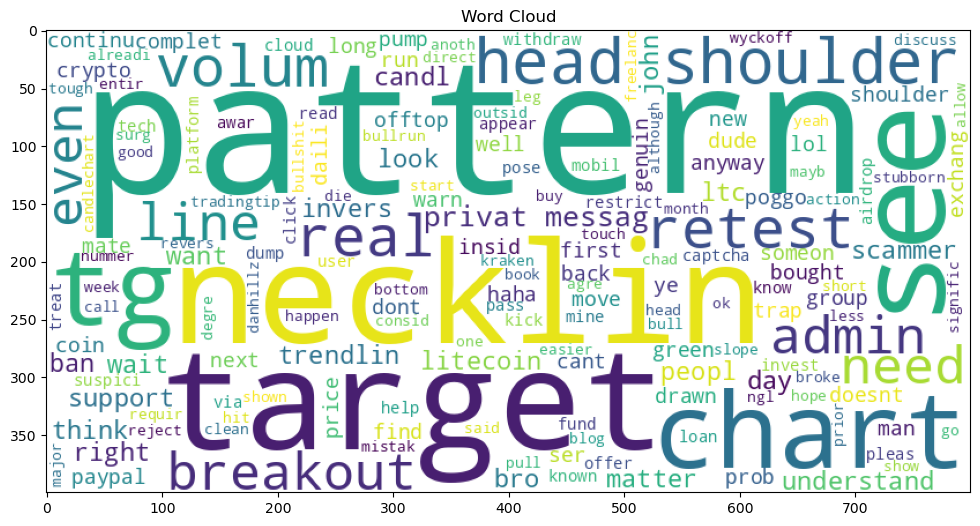

In [109]:


plt.figure(figsize=(15, 6))
plt.imshow(wc)
plt.title("Word Cloud")
plt.show()

In [110]:
words = []
for msg in df['stemmed_data'].tolist():
    for word in msg.split():
        words.append(word)

In [114]:
# Most frequent words
from collections import Counter
freq_words = Counter(words).most_common(10)
freq_words

[('pattern', 16),
 ('necklin', 8),
 ('target', 8),
 ('shoulder', 8),
 ('head', 7),
 ('see', 6),
 ('chart', 6),
 ('tg', 6),
 ('real', 5),
 ('volum', 5)]

In [119]:
freq_df = pd.DataFrame(freq_words)

In [122]:
freq_df

,0,1
0,pattern,16
1,necklin,8
2,target,8
3,shoulder,8
4,head,7
5,see,6
6,chart,6
7,tg,6
8,real,5
9,volum,5


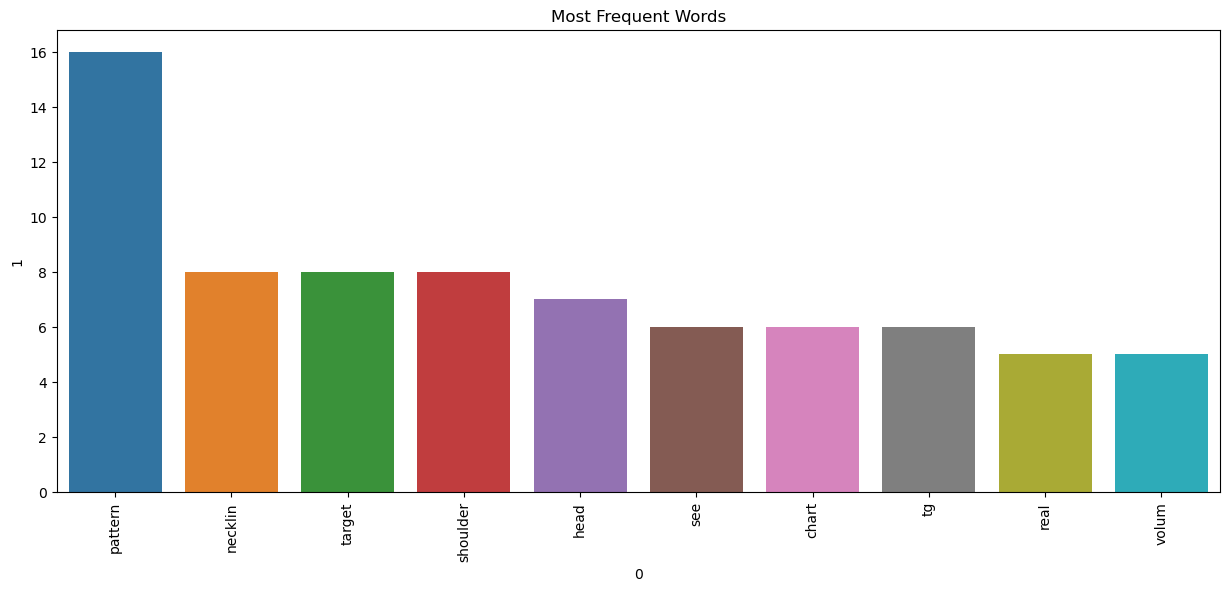

In [125]:
plt.figure(figsize=(15, 6))
plt.title("Most Frequent Words")
sns.barplot(data=freq_df,x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()